---
# EXPLORATORY DATA ANALYSIS OF ACCOUNTS
---

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\OneDrive\GitHub\CRM\accounts.csv")
accounts = pd.DataFrame(data)
accounts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


----------------------------------------------------------------
# Customer Demographics Analysis
---
- What are the distributions of sectors and office locations among the customers? 

In [3]:
# Distribution of sectors
sector_counts = accounts['sector'].value_counts()
print("Sector Distribution:")
print(sector_counts)

# Distribution of office locations
location_counts = accounts['office_location'].value_counts()
print("\nOffice Location Distribution:")
print(location_counts)

Sector Distribution:
sector
retail                17
technolgy             12
medical               12
marketing              8
finance                8
software               7
entertainment          6
telecommunications     6
services               5
employment             4
Name: count, dtype: int64

Office Location Distribution:
office_location
United States    71
Kenya             1
Philipines        1
Japan             1
Italy             1
Norway            1
Korea             1
Jordan            1
Brazil            1
Germany           1
Panama            1
Belgium           1
Romania           1
Poland            1
China             1
Name: count, dtype: int64


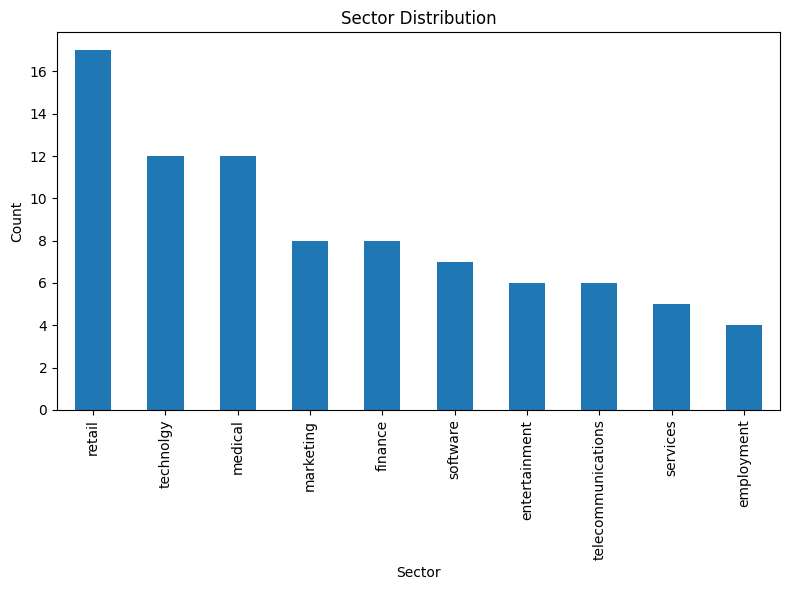

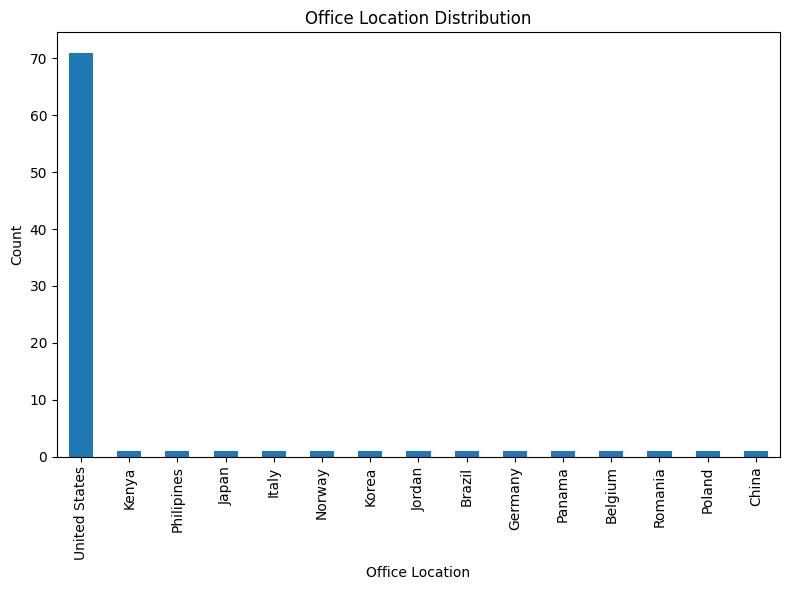

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sectors
sector_counts = accounts['sector'].value_counts()

# Plot the sector distribution
plt.figure(figsize=(8, 6))
sector_counts.plot(kind='bar')
plt.title('Sector Distribution')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of office locations
location_counts = accounts['office_location'].value_counts()

# Plot the office location distribution
plt.figure(figsize=(8, 6))
location_counts.plot(kind='bar')
plt.title('Office Location Distribution')
plt.xlabel('Office Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- How does the distribution of years established vary across different sectors?

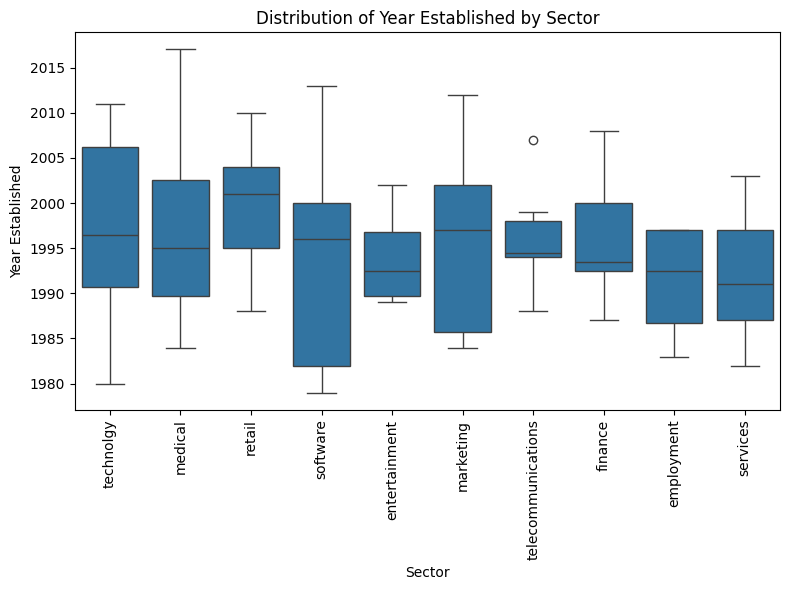

In [5]:
# Box plot of year established by sector
plt.figure(figsize=(8, 6))
sns.boxplot(x='sector', y='year_established', data=accounts)
plt.title('Distribution of Year Established by Sector')
plt.xlabel('Sector')
plt.ylabel('Year Established')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

---
# Financial Analysis
---
- What is the overall revenue distribution among the customers?

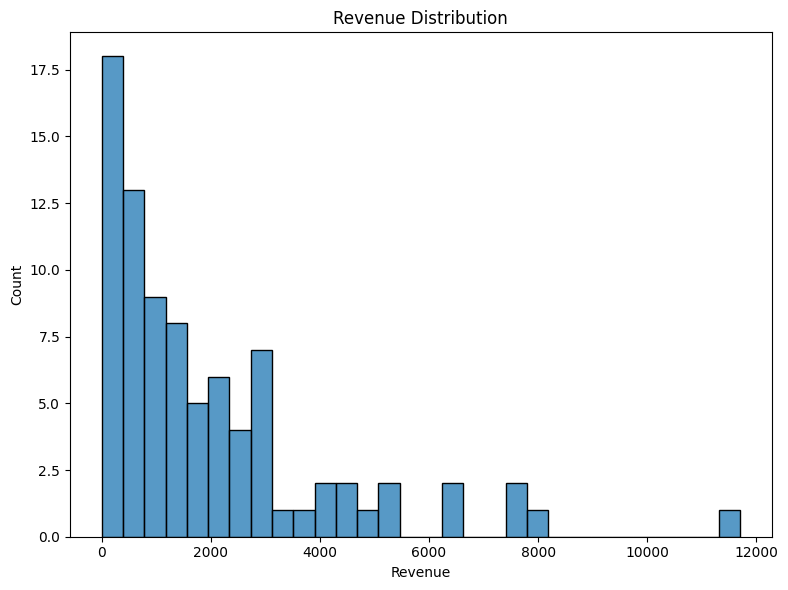

C:\Users\AppData\Local\Temp\ipykernel_18828\3943395259.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accounts['revenue'], shade=True)


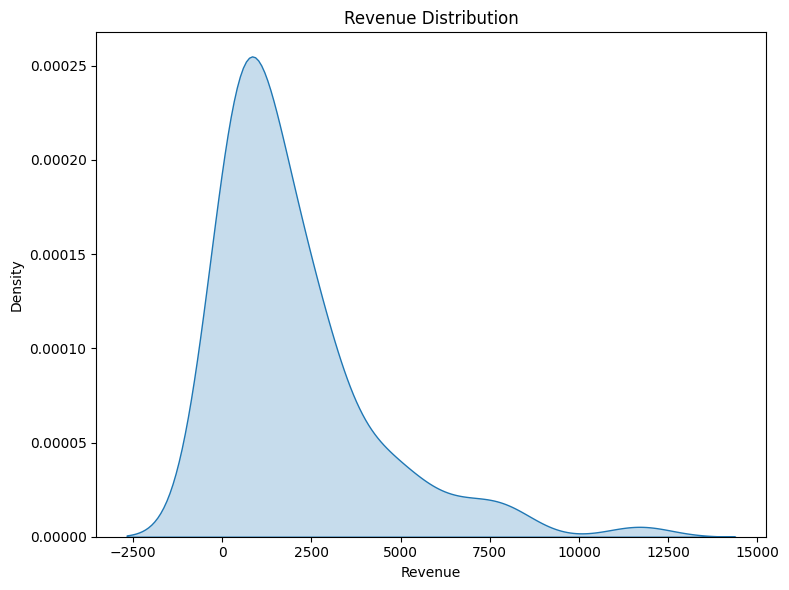

In [6]:
# Histogram of revenue distribution
plt.figure(figsize=(8, 6))
sns.histplot(accounts['revenue'], bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Density plot of revenue distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(accounts['revenue'], shade=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


- Are there any noticeable trends or patterns in revenue based on sector or office location?

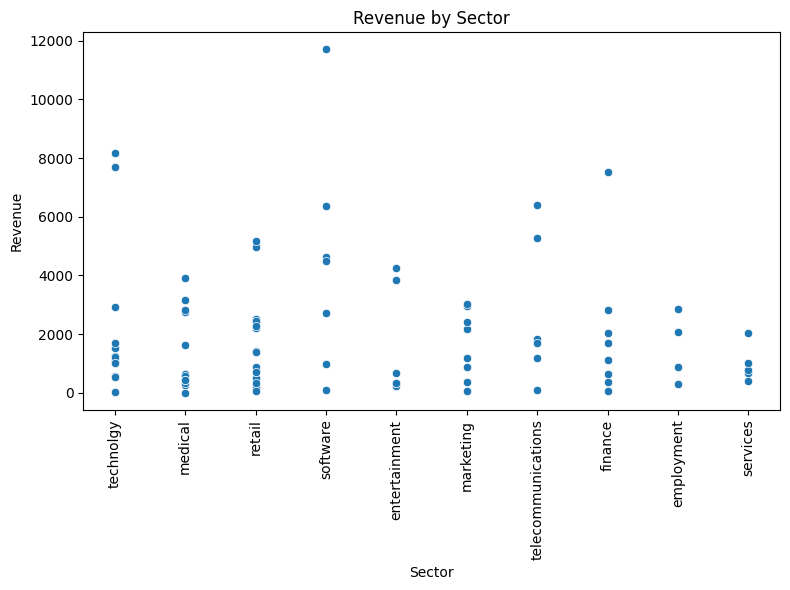

C:\Users\AppData\Local\Temp\ipykernel_18828\1408929301.py:13: FutureWarning: The provided callable <function mean at 0x0000020BA67A55A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(accounts, values='revenue', index='office_location', columns='sector', aggfunc=np.mean)


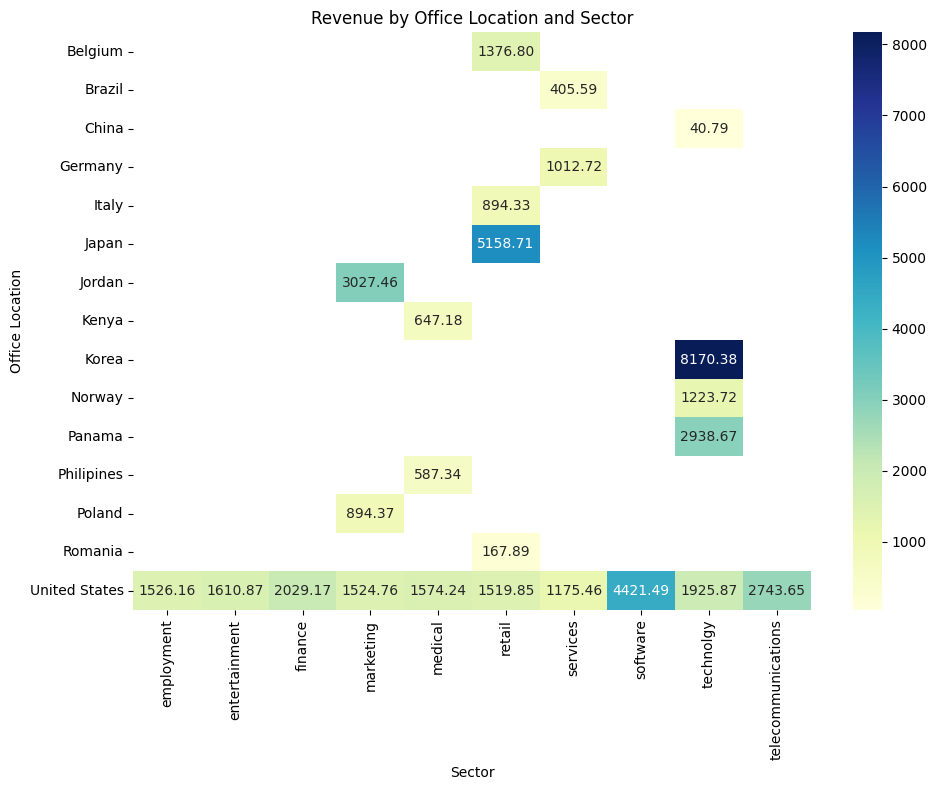

In [7]:
# Scatter plot of revenue by sector
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sector', y='revenue', data=accounts)
plt.title('Revenue by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Heatmap of revenue by office location
pivot_table = pd.pivot_table(accounts, values='revenue', index='office_location', columns='sector', aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Revenue by Office Location and Sector')
plt.xlabel('Sector')
plt.ylabel('Office Location')
plt.tight_layout()
plt.show()

---
# Geographic Analysis
---
- Which office locations have the highest concentration of customers?

In [8]:
location_counts = accounts['office_location'].value_counts()
print("Office Locations with Highest Concentration of Customers:")
print(location_counts.nlargest(5))

Office Locations with Highest Concentration of Customers:
office_location
United States    71
Kenya             1
Philipines        1
Japan             1
Italy             1
Name: count, dtype: int64


- Are there any regional differences in revenue or company size?

In [9]:
# Pivot table for revenue by region
revenue_pivot = pd.pivot_table(accounts, values='revenue', index='office_location', aggfunc=np.mean)
print("Pivot Table for Revenue by Region:")
print(revenue_pivot)

# Pivot table for company size by region
size_pivot = pd.pivot_table(accounts, values='employees', index='office_location', aggfunc=np.mean)
print("\nPivot Table for Company Size by Region:")
print(size_pivot)

Pivot Table for Revenue by Region:
                     revenue
office_location             
Belgium          1376.800000
Brazil            405.590000
China              40.790000
Germany          1012.720000
Italy             894.330000
Japan            5158.710000
Jordan           3027.460000
Kenya             647.180000
Korea            8170.380000
Norway           1223.720000
Panama           2938.670000
Philipines        587.340000
Poland            894.370000
Romania           167.890000
United States    2014.054225

Pivot Table for Company Size by Region:
                    employees
office_location              
Belgium           1165.000000
Brazil            1179.000000
China              142.000000
Germany           3492.000000
Italy             1635.000000
Japan            17479.000000
Jordan            9516.000000
Kenya             1185.000000
Korea            16499.000000
Norway            2497.000000
Panama            8775.000000
Philipines        1356.000000
Poland     

C:\Users\AppData\Local\Temp\ipykernel_18828\2406968150.py:2: FutureWarning: The provided callable <function mean at 0x0000020BA67A55A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  revenue_pivot = pd.pivot_table(accounts, values='revenue', index='office_location', aggfunc=np.mean)
C:\Users\AppData\Local\Temp\ipykernel_18828\2406968150.py:7: FutureWarning: The provided callable <function mean at 0x0000020BA67A55A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  size_pivot = pd.pivot_table(accounts, values='employees', index='office_location', aggfunc=np.mean)


C:\Users\AppData\Local\Temp\ipykernel_18828\1750117857.py:2: FutureWarning: The provided callable <function mean at 0x0000020BA67A55A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  revenue_pivot = pd.pivot_table(accounts, values='revenue', index='office_location', aggfunc=np.mean)


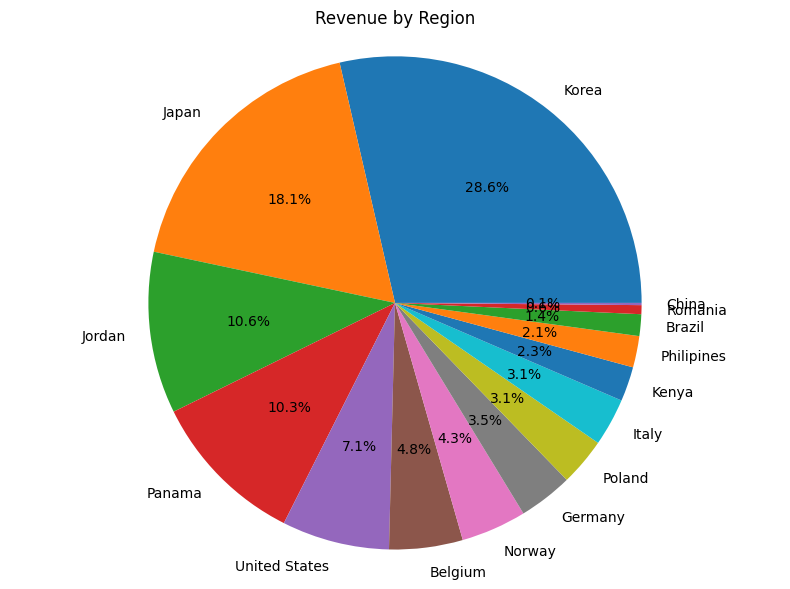

C:\Users\AppData\Local\Temp\ipykernel_18828\1750117857.py:17: FutureWarning: The provided callable <function mean at 0x0000020BA67A55A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  size_pivot = pd.pivot_table(accounts, values='employees', index='office_location', aggfunc=np.mean)


<Figure size 800x600 with 0 Axes>

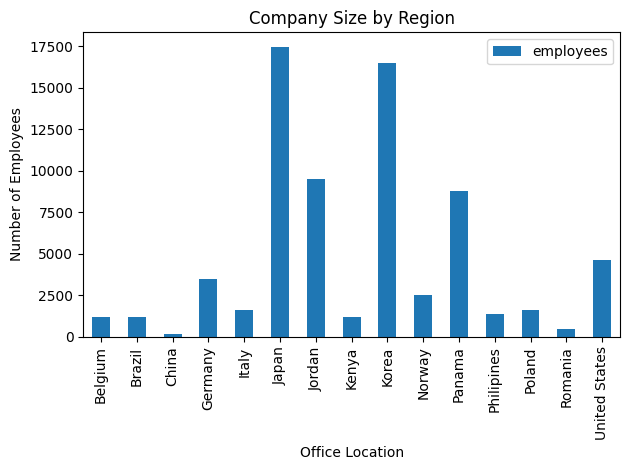

In [10]:
# Pivot table for revenue by region
revenue_pivot = pd.pivot_table(accounts, values='revenue', index='office_location', aggfunc=np.mean)

# Sort the revenue_pivot DataFrame in descending order
revenue_pivot = revenue_pivot.sort_values(by='revenue', ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(revenue_pivot['revenue'], labels=revenue_pivot.index, autopct='%1.1f%%')
plt.title('Revenue by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.tight_layout()
plt.show()


# Pivot table for company size by region
size_pivot = pd.pivot_table(accounts, values='employees', index='office_location', aggfunc=np.mean)

# Plot the company size by region
plt.figure(figsize=(8, 6))
size_pivot.plot(kind='bar')
plt.title('Company Size by Region')
plt.xlabel('Office Location')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
